**Import libraries**

In [1]:
import torch # YOLOv5 implemented using pytorch

In [2]:
from IPython.display import Image #this is to render predictions

In [3]:
cd /content/drive/MyDrive/Yolov5

/content/drive/MyDrive/Yolov5


In [4]:
ls

Traffic-Signs-Dataset-in-YOLO-format.ipynb


In [5]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 9239, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 9239 (delta 0), reused 0 (delta 0), pack-reused 9238
Receiving objects: 100% (9239/9239), 9.54 MiB | 7.24 MiB/s, done.
Resolving deltas: 100% (6428/6428), done.


In [6]:
cd yolov5

/content/drive/My Drive/Yolov5/yolov5


In [7]:
!pip install -r requirements.txt

     |████████████████████████████████| 636 kB 12.5 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [8]:
!pip install tensorflow==2.3.1 
!pip install tensorboard==2.4.1

     |████████████████████████████████| 320.4 MB 11 kB/s 
     |████████████████████████████████| 459 kB 44.0 MB/s 
     |████████████████████████████████| 20.1 MB 1.6 MB/s 
     |████████████████████████████████| 2.9 MB 39.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
 

     |████████████████████████████████| 10.6 MB 8.9 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0


**Download Dataset**

In [10]:
!pip install -q kaggle

In [32]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [33]:
!cp kaggle/kaggle.json ~/.kaggle/

In [34]:
!chmod 600 ~/.kaggle/kaggle.json

In [35]:
!kaggle datasets download -d valentynsichkar/traffic-signs-dataset-in-yolo-format

 96% 241M/250M [00:07<00:00, 34.3MB/s]
100% 250M/250M [00:07<00:00, 34.9MB/s]


In [ ]:
!unzip traffic-signs-dataset-in-yolo-format.zip

In [49]:
ls

classes.names
data/
data_copy/
getting-full-path.py
kaggle/
test.txt
Traffic-Signs-Dataset-in-YOLO-format.ipynb
traffic-signs-dataset-in-yolo-format.zip
traffic-sign-to-test.mp4
train.txt
ts_data.data
yolov3_ts_test.cfg
yolov3_ts_train.cfg
yolov5/


# Divide the dataset in train and val folder.

In [52]:
import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = '/content/drive/MyDrive/Yolov5/dataset/images/train'
valPath = '/content/drive/MyDrive/Yolov5/dataset/images/val'
crsPath = '/content/drive/MyDrive/Yolov5/data/ts' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)


training images are :  592
Validation images are :  148


In [53]:

trainimagePath = '/content/drive/MyDrive/Yolov5/dataset/images/train'
trainlabelPath = '/content/drive/MyDrive/Yolov5/dataset/labels/train'
valimagePath = '/content/drive/MyDrive/Yolov5/dataset/images/val'
vallabelPath = '/content/drive/MyDrive/Yolov5/dataset/labels/val'
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)



#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
shutil.move(crsPath, valPath) 




'/content/drive/MyDrive/Yolov5/dataset/images/val/ts'

# Create dataset.yaml

## move the dataset’s dataset.yaml file to the /content/yolov5/data directory. 
## This file contains information required by YOLO to train the model on the custom data.
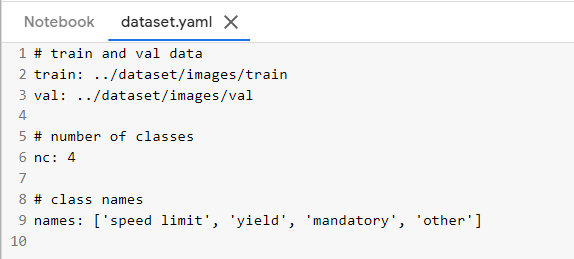

# Run

In [54]:
%cd yolov5

/content/drive/My Drive/Yolov5/yolov5


In [55]:
!python train.py --img 415 --batch 16 --epochs 30 --data dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0, patience=30
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 32 (delta 16), reused 28 (delta 13), pack-reused 0
Unpacking objects: 100% (32/32), done.
From https://github.com/ultralytics/yolov5
   a8eb4fc..502088d  feature/annotator -> origin/feature/annotator
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-387-g7b35971 torc

# Detect

In [57]:
!python detect.py --source runs/train/exp/a.jpg --weights /content/drive/MyDrive/Yolov5/yolov5/runs/train/exp/weights/best.pt

detect: weights=['/content/drive/MyDrive/Yolov5/yolov5/runs/train/exp/weights/best.pt'], source=runs/train/exp/a.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-387-g7b35971 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7062001 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/drive/MyDrive/Yolov5/yolov5/runs/train/exp/a.jpg: 384x640 2 speed limits, Done. (0.028s)
Results saved to runs/detect/exp2
Done. (0.901s)


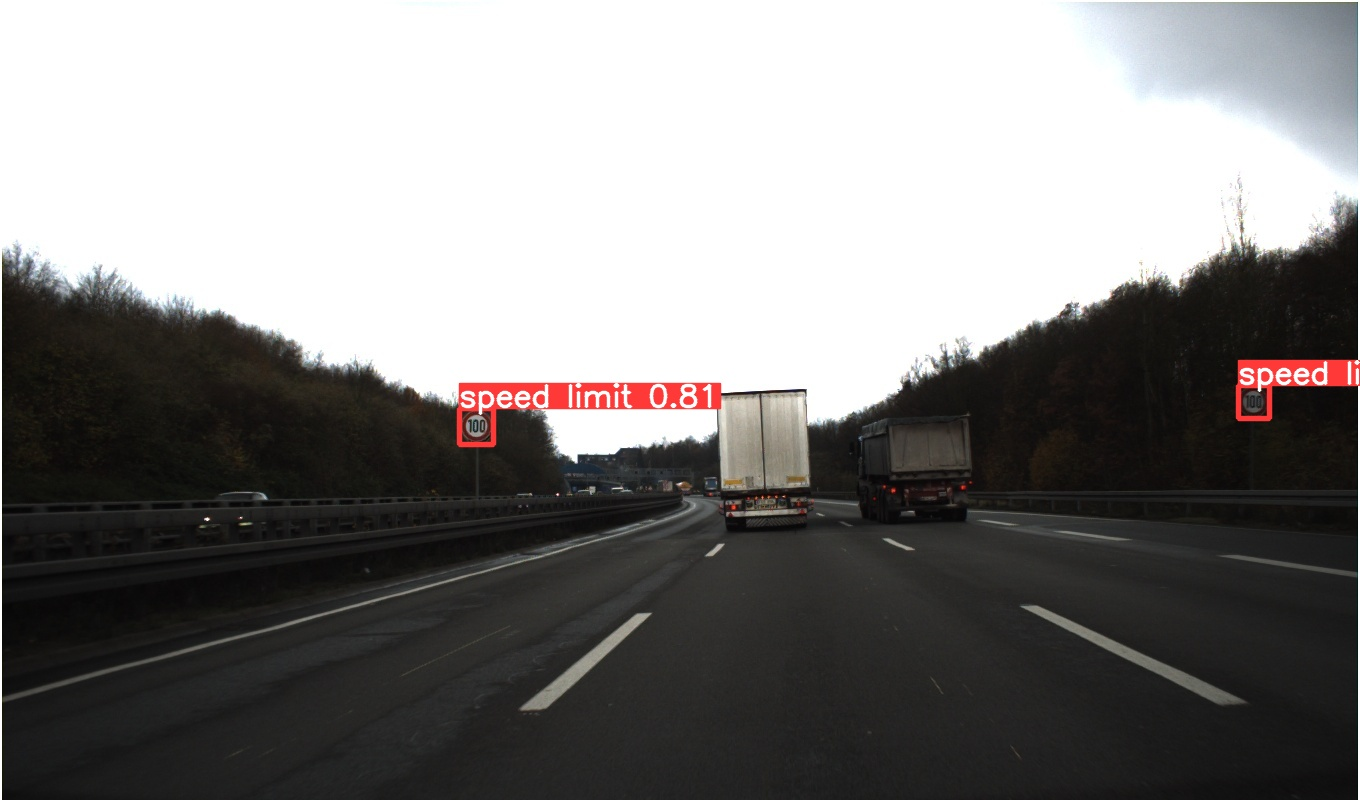

In [58]:
Image(filename="/content/drive/MyDrive/Yolov5/yolov5/runs/detect/exp2/a.jpg", width=416)